In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [4]:
transform = transforms.Compose([transforms.Pad(2), transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

100%|██████████| 9.91M/9.91M [00:03<00:00, 2.65MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 237kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 2.23MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 2.27MB/s]


In [5]:
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.AvgPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.conv3 = nn.Conv2d(16, 120, 5)
        self.fc1 = nn.Linear(120, 84)
        self.fc2 = nn.Linear(84, 10)

    def forward(self, x):
        x = torch.tanh(self.conv1(x))
        x = self.pool(x)
        x = torch.tanh(self.conv2(x))
        x = self.pool(x)
        x = torch.tanh(self.conv3(x))
        x = x.view(-1, 120)
        x = torch.tanh(self.fc1(x))
        x = self.fc2(x)
        return x

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LeNet5().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [7]:
for epoch in range(5):
    model.train()
    for data, target in train_loader:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

In [9]:
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        pred = output.argmax(dim=1)
        correct += pred.eq(target).sum().item()
        total += target.size(0)
test_acc = correct / total
print(f'Test accuracy: {test_acc:.4f}')

Test accuracy: 0.9848


In [10]:
data_iter = iter(test_loader)
images, labels = next(data_iter)
images, labels = images[:5].to(device), labels[:5].to(device)
outputs = model(images)
pred_labels = outputs.argmax(dim=1).cpu().numpy()
true_labels = labels.cpu().numpy()

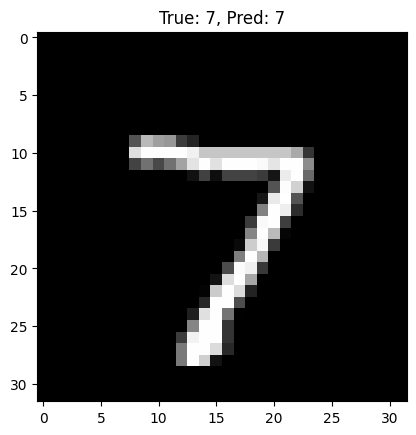

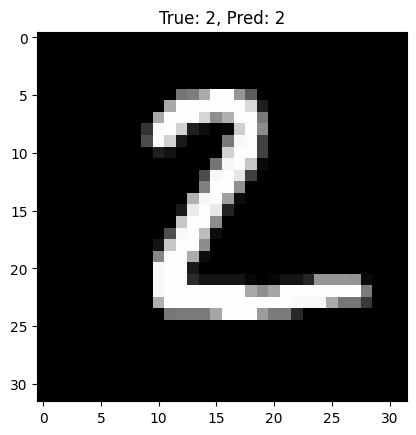

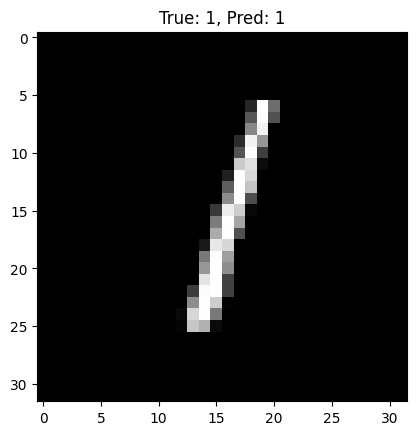

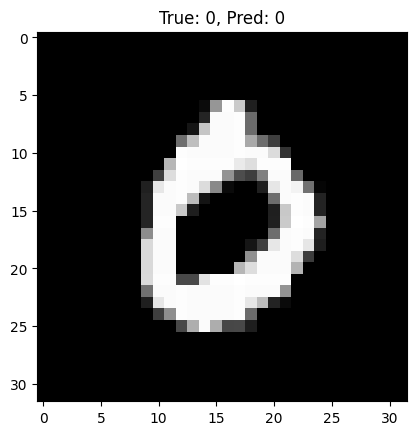

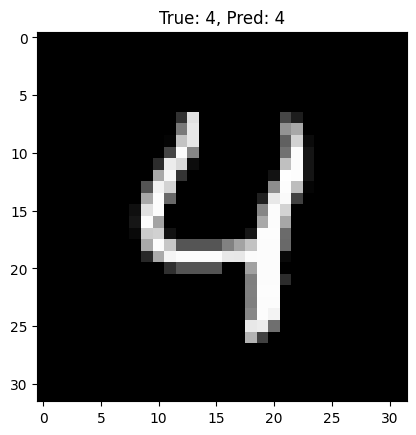

In [11]:

for i in range(5):
    plt.imshow(images[i].cpu().squeeze(), cmap='gray')
    plt.title(f'True: {true_labels[i]}, Pred: {pred_labels[i]}')
    plt.show()